In [ ]:
print("hi salut")

In [ ]:
# 1.1 Importations ESSENTIELLES  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1.2 Pourquoi ces imports ?
"""
- Pandas : manipulation données tabulaires
- NumPy : calculs numériques optimisés
- Matplotlib : visualisation bas niveau
- Seaborn : statistiques visuelles prêtes à l'emploi
"""

"\n- Pandas : manipulation données tabulaires\n- NumPy : calculs numériques optimisés\n- Matplotlib : visualisation bas niveau\n- Seaborn : statistiques visuelles prêtes à l'emploi\n"

In [ ]:
# 2.1 Chargement
df = pd.read_csv('titanic.csv')

# 2.2 PREMIER regard critique
print("=== DÉTECTION DE BIAIS POTENTIELS ===")

# Biais de sélection : qui est dans notre dataset ?
print(f"Répartition par classe (Pclass):")
print(df['Pclass'].value_counts(normalize=True))

# Biais de mesure : données manquantes = problème de collecte
print(f"\n=== VALEURS MANQUANTES (biais de mesure) ===")
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
print(pd.DataFrame({'Missing': missing, 'Pourcentage': missing_pct}))

=== DÉTECTION DE BIAIS POTENTIELS ===
Répartition par classe (Pclass):
Pclass
3    0.521531
1    0.255981
2    0.222488
Name: proportion, dtype: float64

=== VALEURS MANQUANTES (biais de mesure) ===
             Missing  Pourcentage
PassengerId        0     0.000000
Survived           0     0.000000
Pclass             0     0.000000
Name               0     0.000000
Sex                0     0.000000
Age               86    20.574163
SibSp              0     0.000000
Parch              0     0.000000
Ticket             0     0.000000
Fare               1     0.239234
Cabin            327    78.229665
Embarked           0     0.000000


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
df.drop("Cabin", axis=1, inplace = True)

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

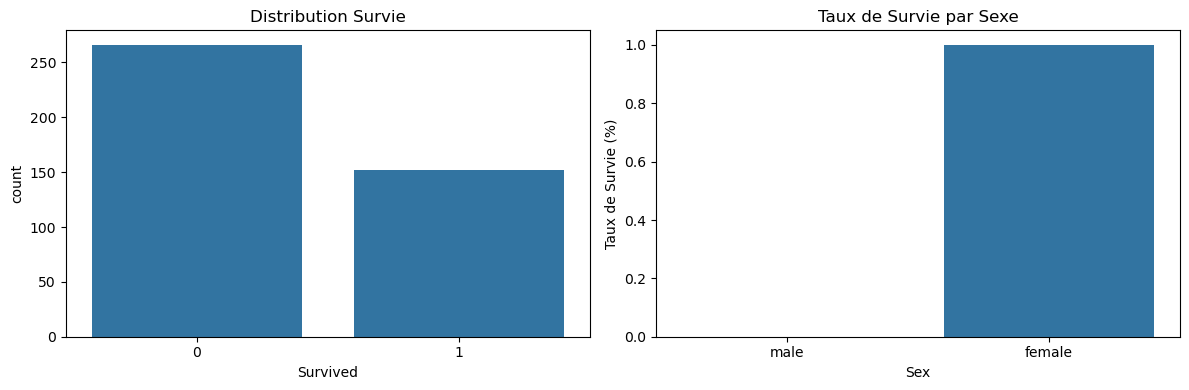

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Countplot simple
sns.countplot(data=df, x='Survived', ax=ax[0])
ax[0].set_title('Distribution Survie')

# Survie par sexe (croisement critique)
sns.barplot(data=df, x='Sex', y='Survived', estimator='mean', ax=ax[1])
ax[1].set_title('Taux de Survie par Sexe')
ax[1].set_ylabel('Taux de Survie (%)')

plt.tight_layout()
plt.show()

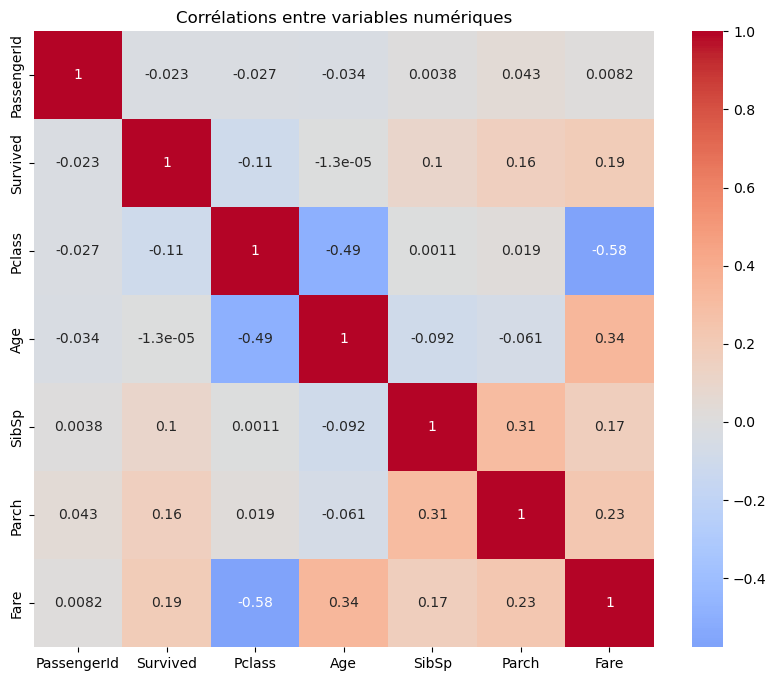

'\n1. Pclass vs Fare (-0.55) : logique, 1ère classe = plus cher\n2. Pclass vs Survived (-0.34) : 1ère classe survit mieux\n3. SibSp vs Parch (0.41) : famille voyage ensemble\n4. Age vs Pclass (-0.37) : passagers plus âgés en 1ère classe\n'

In [ ]:
# Heatmap des corrélations
plt.figure(figsize=(10, 8))
corr_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Corrélations entre variables numériques')
plt.show()

# Interprétation à donner :
"""
1. Pclass vs Fare (-0.55) : logique, 1ère classe = plus cher
2. Pclass vs Survived (-0.34) : 1ère classe survit mieux
3. SibSp vs Parch (0.41) : famille voyage ensemble
4. Age vs Pclass (-0.37) : passagers plus âgés en 1ère classe
"""

In [ ]:
df.Embarked.value_counts()

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

Suppression : 86 lignes perdues (20.6%)


C:\Users\stephan\AppData\Local\Temp\ipykernel_1320\83169185.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_impute['Age'].fillna(df['Age'].median(), inplace=True)  # robuste aux outliers
C:\Users\stephan\AppData\Local\Temp\ipykernel_1320\83169185.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alw

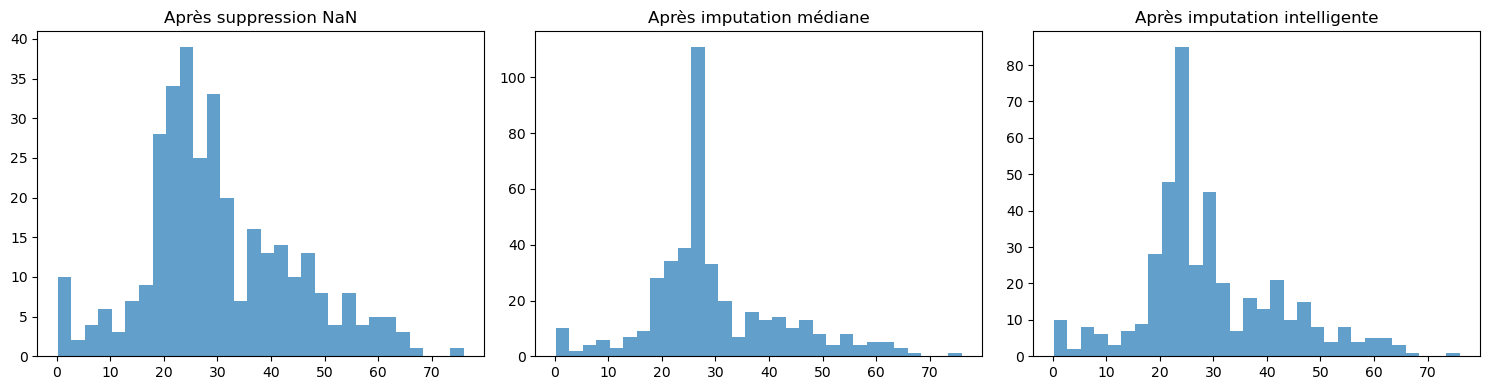

In [ ]:
# 4.1 APPROCHE 1 : Suppression (naïve)
df_drop = df.dropna(subset=['Age', 'Embarked'])
print(f"Suppression : {len(df)-len(df_drop)} lignes perdues ({((len(df)-len(df_drop))/len(df))*100:.1f}%)")

# 4.2 APPROCHE 2 : Imputation Statistique
df_impute = df.copy()
df_impute['Age'].fillna(df['Age'].median(), inplace=True)  # robuste aux outliers
df_impute['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# 4.3 APPROCHE 3 : Imputation Intelligente (basée sur d'autres variables)
df_smart = df.copy()
# Exemple : imputer l'âge médian par classe et titre
df_smart['Title'] = df_smart['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
age_by_title_class = df_smart.groupby(['Title', 'Pclass'])['Age'].median()

def impute_age(row):
    if pd.isnull(row['Age']):
        return age_by_title_class.get((row['Title'], row['Pclass']), df['Age'].median())
    return row['Age']

df_smart['Age'] = df_smart.apply(impute_age, axis=1)

# 4.4 COMPARAISON des distributions
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
axes[0].hist(df_drop['Age'], bins=30, alpha=0.7, label='Suppression')
axes[0].set_title('Après suppression NaN')
axes[1].hist(df_impute['Age'], bins=30, alpha=0.7, label='Imputation médiane')
axes[1].set_title('Après imputation médiane')
axes[2].hist(df_smart['Age'], bins=30, alpha=0.7, label='Imputation intelligente')
axes[2].set_title('Après imputation intelligente')
plt.tight_layout()
plt.show()

In [ ]:
# Créer des features qui réduisent les biais
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsChild'] = (df['Age'] < 18).astype(int)
df['IsElderly'] = (df['Age'] > 60).astype(int)

# Variable composite plus juste que "Sex" seul
df['PriorityGroup'] = ((df['IsChild'] == 1) | 
                       (df['Sex'] == 'female') | 
                       (df['Pclass'] == 1)).astype(int)